### SVM 用于图像识别的原理
SVM（support vector machines, SVM）是一种二分类模型,它的基本模型是定义在特征空间上的间隔最大的线性分类器。
SVM的的学习策略就是间隔最大化。
参考：https://zhuanlan.zhihu.com/p/93224022
SVM学习：

In [1]:
import os
import glob
import cv2 
import math
import numpy as np
from keras.utils import to_categorical
from scipy.linalg import svd#进行奇异值分解
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

##### 进行图像数据预处理

In [6]:
#文件所在路径
path = glob.glob("E:/face_dectection/figure/*/*.jpg")

In [7]:
print(len(path))

894


In [10]:
X=[]
count=0
for img in path:
    if "jpg" in img:
        try:
            n = cv2.imread(img)#发送读取错误时跳过
            gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        except:
            X.append(np.zeros((50,50)))#填充错误值
            continue
        gray = cv2.resize(gray,(50,50))
        X.append(gray)
        count=count+1
print(count)

742


In [12]:
sizeImg = X[0].shape
#创建X个与图片大小一样的0位数组
A = np.zeros((sizeImg[0]*sizeImg[1],len(X)))
for i in range(0, len(X)):
    tmp = (np.array(X[i]).reshape(-1))#转化为一维数组
    A[:,i] = np.array(tmp)

In [13]:
A.shape

(2500, 894)

In [15]:
Y_map_num = np.zeros((len(X)))#创建临时数组
i = 0
for img in path:
    if "jpg" in img:
        if "liuyifei" in img:
            Y_map_num[i]=0
        elif "yangmi" in img:
            Y_map_num[i]=1
        elif "dilireba" in img:
            Y_map_num[i]=2
        elif "liyitong" in img:
            Y_map_num[i]=3
        elif "zhaoliyin" in img:
            Y_map_num[i]=4
        i = i+1

In [ ]:
Y_map_label = [0 for x in range(len(X))]
i = 0
for img in path:
    if "jpg" in img:
        if "liuyifei" in img:
            Y_map_label[i]="liuyifei"
        elif "yangmi" in img:
            Y_map_label[i]="yangmi"
        elif "dilireba" in:
            Y_map_label[i]="dilireba"
        elif "liyitong" in img:
            Y_map_label[i]="liyitong"
        elif "zhaoliyin" in img:
            Y_map_label[i]="zhaoliyin"
        i = i+1

In [7]:
#进行数据分割
A=A.T
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(A, Y, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4622, 2500), (514, 2500), (4622,), (514,))

In [8]:
from sklearn.preprocessing import StandardScaler#去均值和方差归一化
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_X, train_Y)

In [10]:
pred_Y = classifier.predict(test_X)
test_Y = test_Y.tolist()

In [11]:
y_test_np = np.asarray(test_Y)
y_test_np

array([54.,  0., 12.,  5., 32., 21., 10., 41., 43., 11., 21.,  7.,  4.,
       36., 54., 48., 43., 24., 21.,  8., 24.,  9.,  0., 23., 14.,  9.,
       58., 58., 30., 31.,  8., 37., 34., 37., 59., 54.,  5.,  8., 12.,
       39., 32., 42., 44., 48., 23.,  3., 13., 24., 51., 52., 52.,  9.,
       51., 23., 17., 39., 25., 14., 31., 33., 56., 10., 24., 16., 41.,
       13., 50., 44., 18., 39., 32., 36., 32.,  0., 24., 57., 19.,  3.,
       30., 30., 33., 18., 14.,  5., 40., 55., 12., 50., 16., 26.,  0.,
       58., 38., 32., 40., 33., 39., 50.,  9., 13.,  0., 33., 19.,  7.,
       36., 31., 45.,  4., 56., 19.,  9., 29., 38., 28., 21., 32., 25.,
       51.,  9., 50., 29., 33., 14., 17., 14.,  0., 59., 45., 55., 22.,
       52.,  3.,  0., 40.,  4., 55., 42.,  8., 48., 11., 13., 36., 34.,
        0., 27., 14., 43., 29., 29.,  0., 28., 13., 40., 29.,  0., 18.,
       43., 33., 43., 48., 26., 20., 18., 26., 52., 37., 19.,  9., 16.,
       47., 32., 15.,  9.,  0., 54., 25.,  0.,  4., 29., 27., 54

In [12]:
print(pred_Y)

[54.  0. 12.  5. 32. 21. 10. 41. 43. 11. 21.  7.  4. 36. 54. 48. 43. 24.
 21.  8. 24.  9.  0. 23. 14.  9. 58. 58. 30. 31.  8. 37. 34. 37. 59. 54.
  5.  8. 12. 39. 32. 42. 44. 48. 23.  3. 13. 24. 51. 52. 52.  9. 51. 23.
 17. 39. 25. 14. 31. 33. 56. 10. 24. 16. 41. 13. 50. 44. 18. 39. 32. 36.
 32.  0. 24. 57. 19.  3. 30. 30. 33. 18. 14.  5. 40. 55. 12. 50. 16. 26.
  0. 58. 38. 32. 40. 33. 39. 50.  9. 13.  0. 33. 19.  7. 36. 31. 45.  4.
 56. 19.  9. 29. 38. 28. 21. 32. 25. 51.  9. 50. 29. 33. 14. 17. 14. 23.
 59. 45. 55. 22. 52.  3.  0. 40.  4. 55. 42.  8. 48. 11. 13. 36. 34.  0.
 27. 14. 43. 29. 29.  0. 28. 13. 40. 29.  0. 18. 43. 33. 43.  0. 26. 20.
 18. 26. 52. 37. 19.  9. 16. 47. 32. 15.  9.  0. 54. 25.  0.  4. 29. 27.
 54. 49. 51. 26. 20. 24. 38. 35. 16. 39. 42. 53. 16. 45. 51. 47. 13. 51.
  9. 13.  0. 33. 16. 53. 28. 23. 36.  0. 55.  0. 15. 54. 16. 54. 12. 51.
 30. 39. 25.  0. 32. 48. 33. 38. 41. 45. 52.  4. 21. 17.  9. 27. 40. 23.
 45. 25. 45. 37.  5. 39. 47.  9.  8. 33. 12. 37. 23

In [13]:
## 进行模型的评价
disc = y_test_np - pred_Y
count = 0
for i in disc:
    if i == 0:
        count += 1
accuracy = ( (100 * count) / len(pred_Y))
print(accuracy)

99.0272373540856


Found 509 correct labels


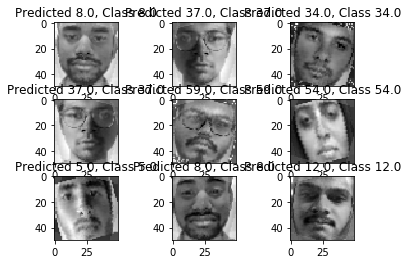

In [20]:
#图像识别情况的展示
correct = np.where(pred_Y==test_Y)[0]
print ("Found %d correct labels" % len(correct))
#print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[30:39]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_Y[correct], test_Y[correct]))
    #plt.tight_layout()

##### SVM、SVC、SVR三者的区别：
https://zhuanlan.zhihu.com/p/37702043